# Titanic Project

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-----------------------------------------------------------------------------
First some basic questions:

1) Who were the passengers on the Titanic? (Age, Gender, Class, etc)
2) What deck were the passengers on and how that relate to their class?
3) Where did the passengers come from?
4) Who was alone and who was with family?

Then, depper ones...

5) What factors helped someone survive the sinking?

START
---------------------------------------------------------------------------------

1)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Total male and female passengers')

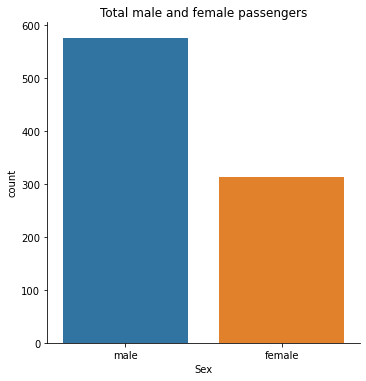

In [29]:
sns.catplot(x='Sex', kind='count', data=titanic_df)
plt.title('Total male and female passengers')

We can see that there were more males than females

Text(0.5, 1.0, 'Total male and female counting the Pclass')

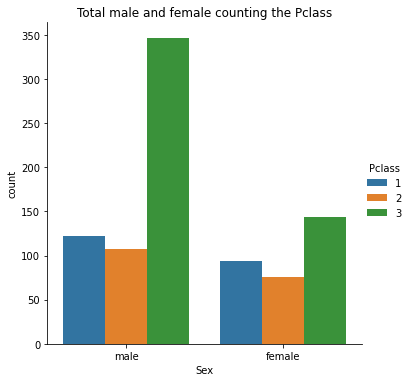

In [33]:
sns.catplot(x='Sex',kind='count', data=titanic_df,hue='Pclass')
plt.title('Total male and female counting the Pclass')

And now we can see that more people (both male and female) was in the third class

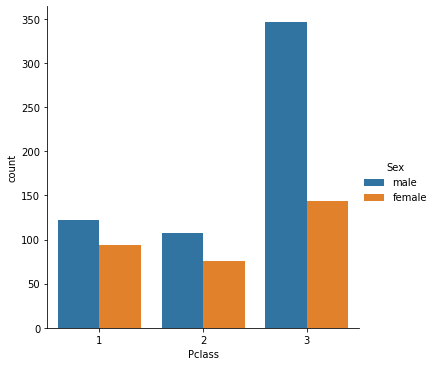

In [36]:
sns.catplot(x='Pclass', kind='count', data=titanic_df, hue='Sex')

The same as we see before, more people were in the third class

In [44]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [51]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [52]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


We seperated the passengers between female, male and child 

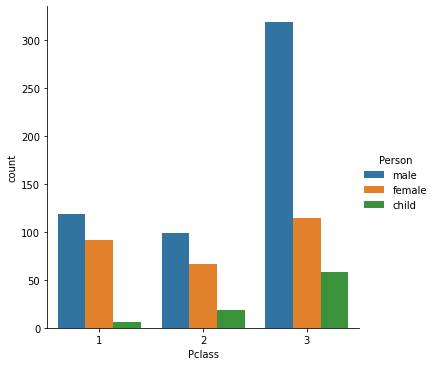

In [57]:
sns.catplot(x='Pclass', kind='count', data=titanic_df, hue='Person')

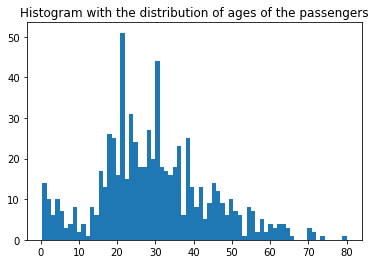

In [62]:
titanic_df['Age'].hist(bins=70, grid=False)
plt.title('Histogram with the distribution of ages of the passengers')
plt.show()

Most of the passengers had between 18 and almost 40 years old

In [65]:
#Average of the passengers age

titanic_df['Age'].mean()

29.69911764705882

In [66]:
#Total of female, male and childs

titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

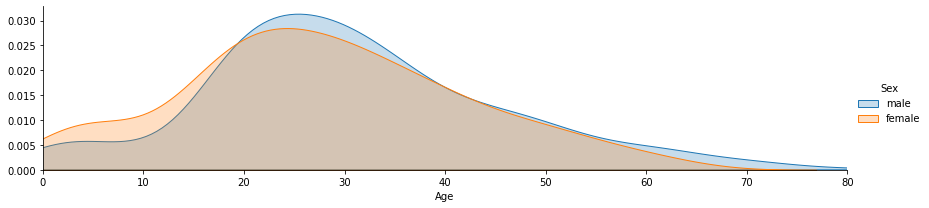

In [71]:
#Ages range by sex

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

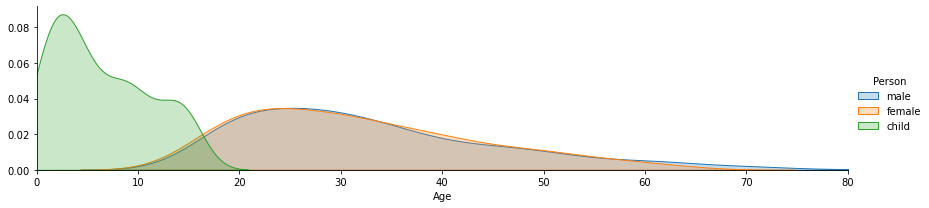

In [72]:
#Ages range by Person

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

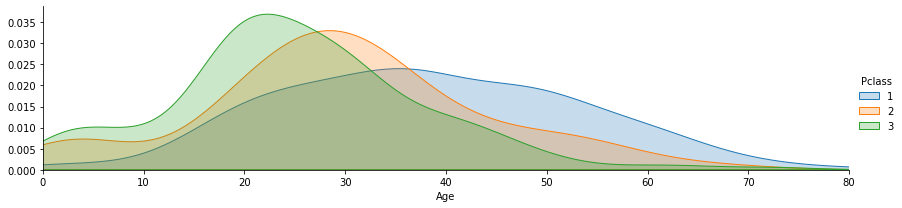

In [73]:
#Ages range by Class

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

We saw how the passengers were based on Sex, Age and Class

2)

In [74]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [75]:
deck = titanic_df['Cabin'].dropna()

In [136]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

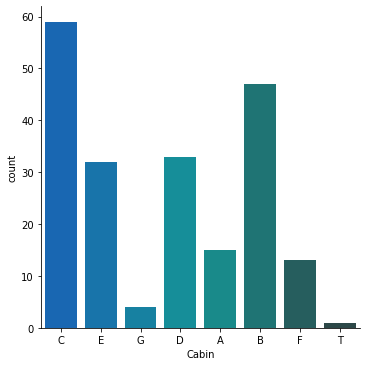

In [139]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin', kind='count', data=cabin_df, palette='winter_d')

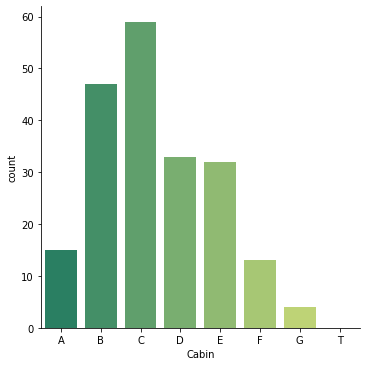

In [140]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', kind='count', order=['A','B','C','D','E','F','G','T'], data=cabin_df, palette='summer')

3)

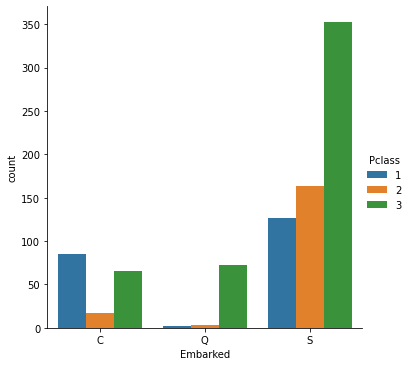

In [102]:
sns.catplot(x='Embarked', order=['C','Q','S'], kind='count', data=titanic_df, hue='Pclass')

C: Cherbourg
Q: Queenstown
S: Southampton

Link for the palettes: http://matplotlib.org/users/colormaps.html

4)

In [103]:
#Who was alone and who was with family

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


SibSp: 1 Had siblings; 0 Had no siblings

Parch: 1 Had parents or children board; 0 Had no parents or children on board

In [104]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [105]:
#if a column is 0, the person were completely alone

titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [106]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'   

C:\Users\Ale Nardone\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [107]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


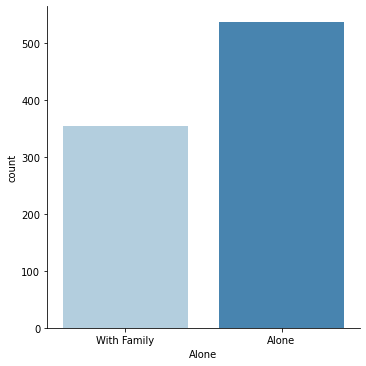

In [108]:
sns.catplot(x='Alone', kind='count', data=titanic_df, palette='Blues')

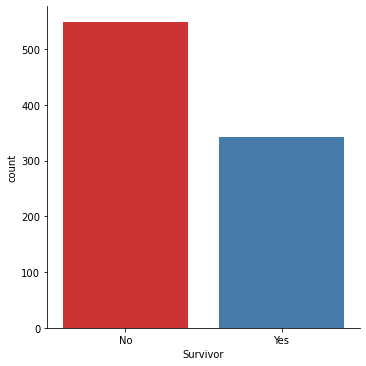

In [110]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

sns.catplot(x='Survivor', kind='count', data=titanic_df, palette='Set1')

C:\Users\Ale Nardone\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


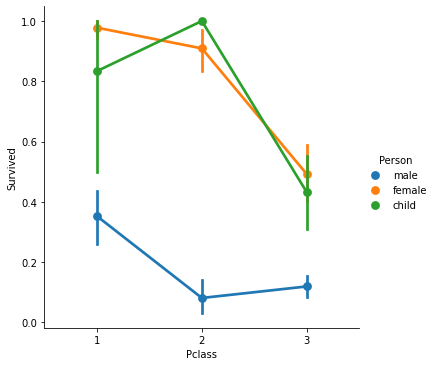

In [117]:
sns.factorplot(x='Pclass', y='Survived', hue='Person', data=titanic_df)

This is an effect of the laddies and children first

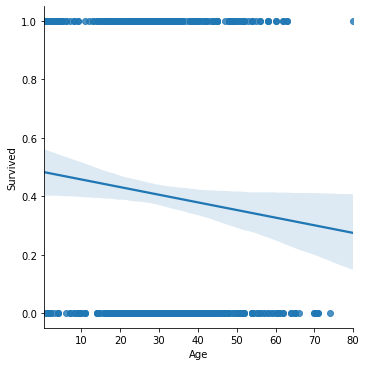

In [119]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

There is a linear trend. As older the person, less likely to survive

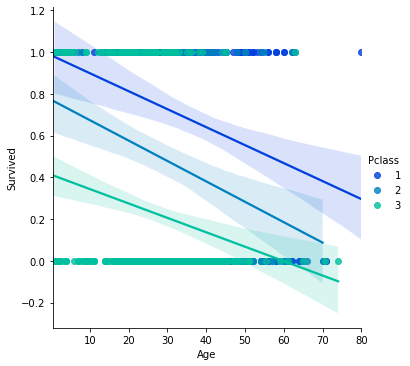

In [120]:
sns.lmplot(x='Age',y='Survived',hue='Pclass', data=titanic_df, palette='winter')

As we saw before, less people of the third class survived 

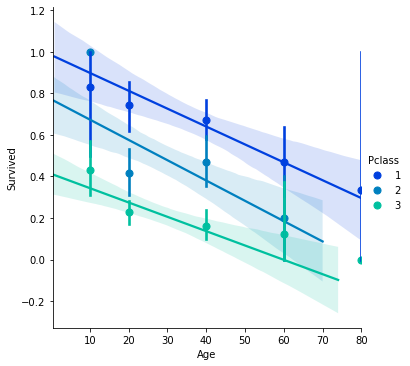

In [121]:
generations = [10,20,40,60,80]

sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

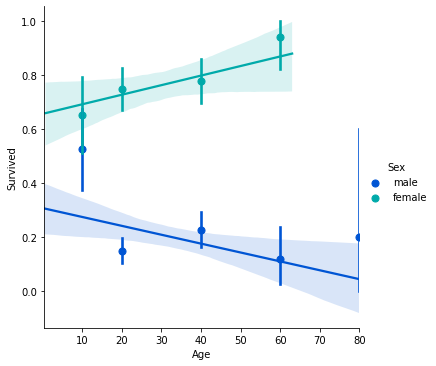

In [123]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

We could see how genter, age and class all related to a passengers chance of survival

More questions:

5) Did the deck have an effect on the passengers survival rate?

6) Did having a family member increase the odds of surviving the crash?

5)

In [154]:
cabin_df.columns = ['Cabin']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


In [170]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='Person'>

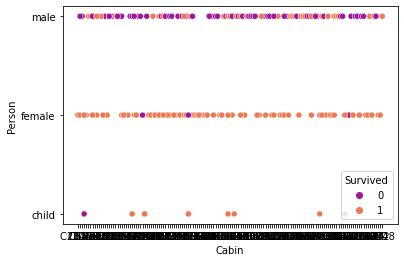

In [192]:
sns.scatterplot(x='Cabin', y='Person', data=titanic_df, hue='Survived', palette='plasma')

The deck doesn't have an effec with the survival rate

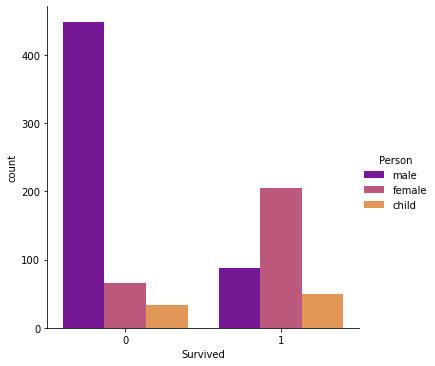

In [193]:
sns.catplot(x='Survived', kind='count', data=titanic_df, hue='Person', palette='plasma')

6)

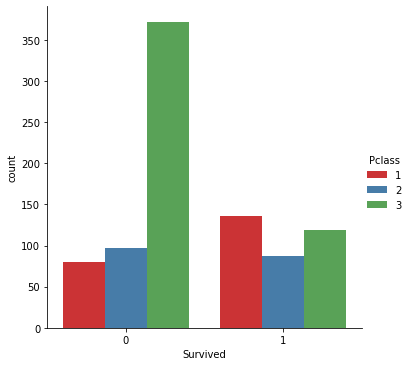

In [194]:
sns.catplot(x='Survived', kind='count', data=titanic_df, hue='Pclass', palette='Set1')

Most people that were alone could survived